In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC") #download data for s and p 500

In [3]:
# query historical data
sp500 = sp500.history(period="max") # get all data

In [4]:
sp500 # use open, high, low, close (price when stock market closed) and volume to predict stock price

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,0.0,0.0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,0.0,0.0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,0.0,0.0


In [5]:
sp500.index #index is furthest left column

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-15 00:00:00-04:00', '2024-07-16 00:00:00-04:00',
               '2024-07-17 00:00:00-04:00', '2024-07-18 00:00:00-04:00',
               '2024-07-19 00:00:00-04:00', '2024-07-22 00:00:00-04:00',
               '2024-07-23 00:00:00-04:00', '2024-07-24 00:00:00-04:00',
               '2024-07-25 00:00:00-04:00', '2024-07-26 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24258, freq=None)

<Axes: xlabel='Date'>

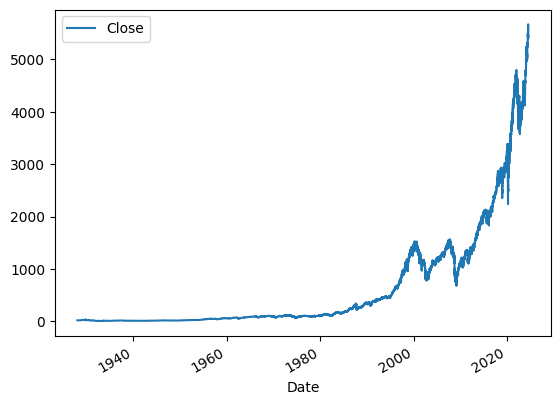

In [6]:
sp500.plot.line(y="Close", use_index=True) #show index, show clsoe price on y axis

In [7]:
del sp500["Dividends"] #don't need these indices
del sp500["Stock Splits"]

In [8]:
# Set up target, what we are predicting using machine learning
# target = whether stock goes up or down
sp500["Tomorrow"] = sp500["Close"].shift(-1) #now tomorrow column is the closing price of the next day

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215


In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) #boolean, make it int so we can use in ml
# target is 1 if price goes up next day, 0 if not

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0


In [12]:
sp500 = sp500.loc["1990-01-01":].copy() #take only from that date onwards
# need .copy to prevent error

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0


In [15]:
from sklearn.ensemble import RandomForestClassifier

# random forest work trains individual decision trains w randomized params. average result from those decision trees
# resistant to overfitting compared to other models
# can pick up nonlinear tendencies in the data

#n_estimators is number of decision trees
#min_samples_split prevents overfitting (higher we set it, less accurate but more overfitting
#random_state means if we run the same model twice, the random numbers are in a predictable sequence (like a random seed)
    # good so we know if the model improved due to randomness or something we added
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# time series, can't use cross validation (because it would use future data to predict past). Would cause leakage, where you are leaking
# info into the model
# only want to use past data to predict future
train = sp500.iloc[:-100] # everything but last 100 rows
test = sp500.iloc[-100:] # last 100 rows

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) #train models using predictors to predict target

RandomForestClassifier(min_samples_split=100, random_state=1)

In [25]:
from sklearn.metrics import precision_score #what percent of the time did the market go up when we said it would?

preds = model.predict(test[predictors])
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
import pandas as pd
preds = pd.Series(preds, index = test.index) #convert to time series, so we know the corresponding date

In [19]:
preds

Date
2024-03-05 00:00:00-05:00    0
2024-03-06 00:00:00-05:00    0
2024-03-07 00:00:00-05:00    0
2024-03-08 00:00:00-05:00    0
2024-03-11 00:00:00-04:00    0
                            ..
2024-07-22 00:00:00-04:00    0
2024-07-23 00:00:00-04:00    0
2024-07-24 00:00:00-04:00    0
2024-07-25 00:00:00-04:00    0
2024-07-26 00:00:00-04:00    0
Length: 100, dtype: int64

In [21]:
precision_score(test["Target"], preds)

0.7142857142857143

In [23]:
# combine actual values w predicted values
# axis = 1 means treat each of input as a column in our dataset
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

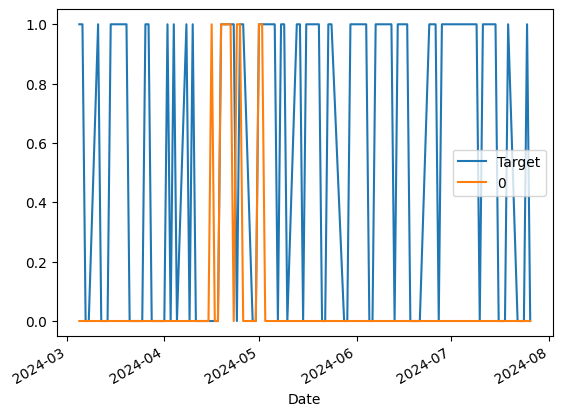

In [24]:
combined.plot()

In [33]:
# Build a more robust way to test our algorithm
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"]) # train our model so input (values under train features) match output (target)
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions") # set index to be same as test data frame
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [34]:
predict(train, test, predictors, model)

,Target,Predictions
Date,,
2024-03-05 00:00:00-05:00,1,0
2024-03-06 00:00:00-05:00,1,0
2024-03-07 00:00:00-05:00,0,0
2024-03-08 00:00:00-05:00,0,0
2024-03-11 00:00:00-04:00,1,0
...,...,...
2024-07-22 00:00:00-04:00,0,0
2024-07-23 00:00:00-04:00,0,0
2024-07-24 00:00:00-04:00,0,0


In [27]:
# start = Take 10 years of data
# step = train model for a year, then next year
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []


    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [30]:
predictions = backtest(sp500, model, predictors)
predictions

,Target,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2024-07-22 00:00:00-04:00,0,0
2024-07-23 00:00:00-04:00,0,0
2024-07-24 00:00:00-04:00,0,0


In [29]:
predictions["Predictions"].value_counts() # 0 for market going down, 1 for market going up

Predictions
0    3606
1    2602
Name: count, dtype: int64

In [32]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5292083013066872

In [35]:
predictions["Target"].value_counts() / predictions.shape[0] # divide by number of rows. this did better than our prediction

Target
1    0.535277
0    0.464723
Name: count, dtype: float64

In [38]:
# Create variety of rolling averages
# mean close price in last 2 days, last trading week (5 days), last three months (60), last year, last four years
# find ratio between todays closing price, vs in those periods
# if market went up a lot, might be due for a downturn. If market went down a lot, might be due for an up turn.
horizons = [2, 5, 60, 250, 1000]
new_predictors = [] # list of new column names

#first round thru loop avg between today's close vs yesterdya's close
# second round is avg between today's close vs in the last 5 days
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean() 
    ratio_column = f"Close_Ratio_{horizon}" #new column name that will store the ratio of today's close price to the rolling average
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"] #ratio of the current closing price to the rolling average closing price for the given horizon and stores it in a new column
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] # calculates the sum of the target values (indicating whether the price went up) over the given horizon. The .shift(1) part ensures that the sum is calculated for the past days up to the current day, not including the current day itself.
    # trend doesnt include current day because if you did, you would use today's target which would provide leakage
    
    new_predictors += [ratio_column, trend_column]

In [42]:
sp500 = sp500.dropna() # gets rid of NaN

In [44]:
sp500 # now data starts in 1993, needed abt 4 years of data to compute all columns without NaN

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 00:00:00-04:00,5543.370117,5557.500000,5497.040039,5505.000000,3760570000,5564.410156,1,0.996417,0.0,0.985278,2.0,1.027555,39.0,1.135072,141.0,1.289587,531.0
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0,1.005367,1.0,0.998299,2.0,1.037054,39.0,1.146367,141.0,1.302800,531.0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0,0.999220,1.0,1.000745,1.0,1.033809,39.0,1.143649,140.0,1.300067,531.0


In [45]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [50]:
train["Target"]

Date
1990-01-02 00:00:00-05:00    0
1990-01-03 00:00:00-05:00    0
1990-01-04 00:00:00-05:00    0
1990-01-05 00:00:00-05:00    1
1990-01-08 00:00:00-05:00    0
                            ..
2024-02-27 00:00:00-05:00    0
2024-02-28 00:00:00-05:00    1
2024-02-29 00:00:00-05:00    1
2024-03-01 00:00:00-05:00    0
2024-03-04 00:00:00-05:00    0
Name: Target, Length: 8608, dtype: int64

In [49]:
model.fit(train[predictors], train["Target"]) # keep in mind predictors = features

RandomForestClassifier(min_samples_split=50, n_estimators=200, random_state=1)

In [53]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"]) 
    preds = model.predict_proba(test[predictors])[:, 1] # returns probability of row being 0 or 1. All rows, only second col which is prob being 
    preds[preds >= .6] = 1 # greater than 60% increases the chance that trade acc goes up
    preds[preds < .6] = 0 
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
    

In [54]:
predictions = backtest(sp500, model, new_predictors)

In [55]:
predictions["Predictions"].value_counts()

Predictions
0.0    4370
1.0     837
Name: count, dtype: int64

In [56]:
precision_score(predictions["Target"], predictions["Predictions"]) # price goes up 57% of the time the model says it will go up

0.5746714456391876